# Exercises and Homework for week 3

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2022)
Nina Stiesdal & Thomas Erben

Homework is due on **Wednesday, 04/05/2022, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `tar`-archive with name `Homework_3_group_XX.tgz` (replace `XX` with your group number) to your tutor.

**Topics of this exercise:**
 * First contact with `numpy`-arrays
 * Basic plots with matplotlib

**Your group number here please:**  Group 05_03

# 1. Lecture Review (0 points)

If you did the lecture review questions [03_Lecture_Review.ipynb](03_Lecture_Review.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

# 2. Numerical Integration (15 points)

We want to numerically estimate the integrals
$$
\int_0^{\pi}\sin(x)\,{\rm d}x = 2 \text{   and   } \int_{-1}^2 x^3\,{\rm d}x=\frac{15}{4}.
$$

We will do the estimation in the easiest possible way with Riemann sums: Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a partition of the interval $I$. With $\Delta x_i=x_{i+1}-x_i; i\in[0,n-1]$ and $f_{\Delta_i}=f\left(\frac{x_i+x_{i+1}}2\right)$, the integral can be approximated with
$$\int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1}\Delta x_i\cdot f_{\Delta_i}=I_{\rm approx}(n).$$ See the following figure for a visualisation of the method. You can read more on Riemann sums on [Wikipedia](https://en.wikipedia.org/wiki/Riemann_sum). 

<img src="figs/sin_cubic.png" style="width: 500px;" style="height: 250px;">



1. Implement the Riemann integration; Given numpy arrays with $x_i$ and corresponding function values, the calculations of $\Delta x_i$, $f_{\Delta_i}$ and the Riemann sum can be done with a single numpy-expression each.
2. Obviously, the accuracy of our numerical estimates depend on the partition of the interval $I=[a;b]$ and particularly on our choice of $n$. One can show that the absolute error $\epsilon_{\rm abs}(n)$ of the integral approximation with Riemann sums behaves like:
$$
\epsilon_{\rm abs}(n)=\left|I_{\rm approx}(n)-\int_a^bf(x)\,{\rm d}x\right| \propto n^{\alpha}.
$$
Perform some experiments to estimate $\alpha$. **Remark:** The task is deliberately vaguely formulated. To come up with a reasonable test is part of the exercise.
3. Modify your program from subtask 1 to estimate the indefinite integral
$$F(x)=\int_0^x \sin(y)\,{\rm d}y$$
in the interval $x\in[0;2\pi]$ and plot $F(x)$. Is the result what
you are expecting?
  **Hint for subtask (3):** Have a look at the function `numpy.cumsum`.

In [1]:
import math
import numpy as np


# numerical integration of the function func over the interval [a,b] with partion into n intervals [x_i, x_(i+1)] 
# evenly spaced over a = x_0 < x_1 < … < x_n = b
def numInt(func, a, b, n):
    x = np.linspace(a, b, n + 1)
    # partition sizes
    dx = x[1:] - x[:-1]
    # function value at the meanpoint of the partitions
    f = func((x[1:] + x[:-1])/2)
    integral = dx * f
    # return the overall sum
    return np.sum(integral)

# the cubical
def cube(a):
    return np.power(a, 3)

n = 10

print(numInt(np.sin, 0, np.pi, n))

print(numInt(cube, -1, 2, n))
    

2.0082484079079745
3.71625


In [2]:

m = 10000

# allocate necessary arrays
integral_n = np.empty(m)
error = np.empty(m)
alpha_n = np.empty(m)


for i in range(0, m):
    # integral estimates with inceasing partion starting at n = 2 up to m + 2
    integral_n[i] = numInt(np.sin, 0, np.pi, i + 2)
    # the deviation of the exact value
    error[i] = np.abs(2 - integral_n[i])
    # estimate of alpha for given partition 
    alpha_n[i] = math.log(error[i], i + 2)

print(alpha_n[m-1])

for i in range(1, m):
    integral_n[i] = numInt(cube, -1, 2, i + 2)
    error[i] = np.abs(15/4 - integral_n[i])
    alpha_n[i] = math.log(error[i], i + 2)
    
print(alpha_n[m-1])


-2.0212201425509453
-1.8679329900256925


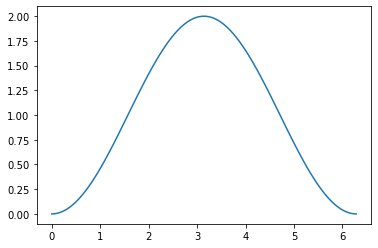

In [3]:
import matplotlib.pyplot as plt
# numerical integration of the indefinite integral F over the function func with domain [a,b] with integration 
# constant such that F(a) = 0
def indefNumInt(func, x):
    # partition sizes
    dx = x[1:] - x[:-1]
    # function value at the meanpoint of the partitions
    f = func((x[1:] + x[:-1])/2)
    integral = dx * f
    # return the cumulative sums
    return np.cumsum(np.insert(integral, 0, 0))

x = np.linspace(0, 2*np.pi, 100)
F = indefNumInt(np.sin,x)
plt.plot(x, F)
plt.show()

## 3. Barplots (10 points)
Reproduce the Riemann Sums plots of Task 2 with `numpy` and `matplotlib`.

**Hints:** (1) Please have a  look at the function `matplotlib.pyplot.bar`; (2) You *do not* need to reproduce the exact colors, linewidths or label sizes of the plots.

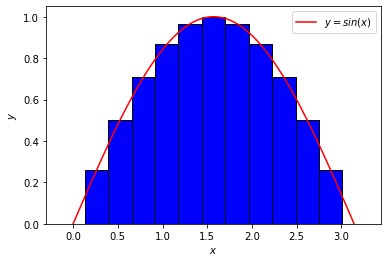

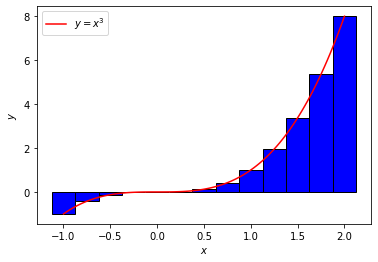

In [55]:

n = 13
# base values for the bar plot
x = np.linspace(0, np.pi, n)
# base values for the function graph
y = np.linspace(0, np.pi, 100)

# barplot for sin()
plt.bar(x, np.sin(x), np.pi/(n-1), color = 'b', edgecolor = 'k')
plt.plot(y, np.sin(y), 'r', label = '$ y = sin(x) $')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

# barplot for cubical
x = np.linspace(-1, 2, n)
y = np.linspace(-1, 2, 100)
plt.bar(x, cube(x), 3/(n-1), color = 'b', edgecolor = 'k')
plt.plot(y, cube(y), 'r', label = '$ y = x^3} $')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()


## 4. Strings (0 points)
Besides `numpy`-arrays, the second important Python-container to learn are strings. You probably already used them in your programs to print status messages or results. Strings are *homogeneous* containers of characters. I do not want to explicitely treat strings in lecture and I therefore ask you to watch the [video lecture on strings](https://youtu.be/OsQ28kHjLj0 ) and to do [string review questions](../video_lecture_01_strings/02_Strings_Review.ipynb) as part of this weeks homework tasks. The lecture notebook for strings is [here](../video_lecture_01_strings/01_Strings.ipynb).  

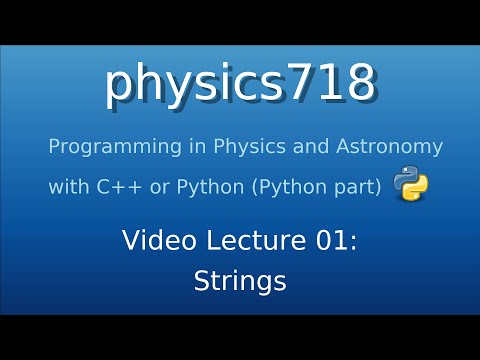

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('OsQ28kHjLj0')